# Binary Classification

The goal is to assign the data $x$ to one of two discrete classes $y\in \{0, 1\}$. In this context, we refer to $y$ as a label.

We select the Bernoulli distribution, which is defined on the domain $\{0, 1\}$. This distribution has a single parameter $\lambda \in [0, 1]$ that represents the probability that $y=1$:

$$
p(y|\lambda) = (1-\lambda)^{1-y} \lambda^y
$$

We set the machine learning model to predict the single distribution parameter $\lambda$. However, $\lambda$ can only take values in the range $[0, 1]$, and we cannot guarantee that the network output will lie in this range. Consequently, we pass the network output through a function that maps the real numbers $\mathbb{R}$ to $[0, 1]$. A suitable function is the **logistic sigmoid**:
$$
\sigma(z) = \frac{1}{1+\exp(-z)}
$$

$$
\lambda = \sigma(f_\theta(x))
$$

The loss function is the negative log-likelihood of the training set
$$
\begin{align}
L(\theta) & = -\sum_{i=1}^{N}\log p(y_i|\sigma(f_\theta(x_i))) \\
& = -\sum_{i=1}^{N} (1-y_i)\log[(1-\sigma(f_\theta(x_i)))] + y_i \log[\sigma(f_\theta(x_i))]
\end{align}
$$

This is known as the **binary cross-entropy** loss.

The transformed model output $\lambda = \sigma(f_\theta(x))$ represents the probability that $y=1$, and it follows that $1-\lambda$ represents the probability that $y=0$. 

When we perform inference, we may want a point estimate of $y$, so we set $y=1$ if $\lambda > 0.5$ and $y=0$ otherwise.

## Data

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
X, y = make_moons(n_samples=100, shuffle=True, noise=0.1)
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [ ]:
y

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

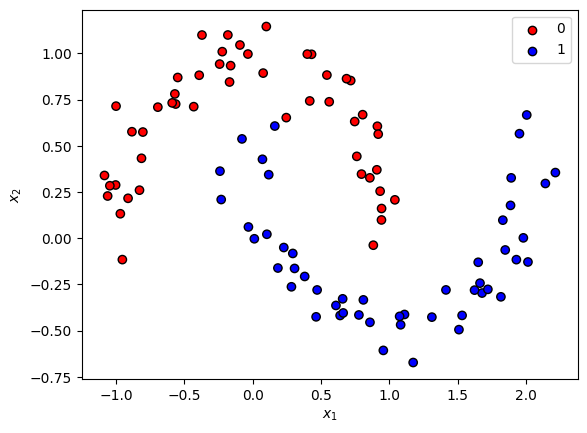

In [ ]:
cm_bright = ListedColormap(['red', 'blue'])

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors="k")
plt.scatter([], [], c='red', label='0', edgecolors='k')
plt.scatter([], [], c='blue', label='1', edgecolors='k')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print("Train")
print(X_train.shape)
print(y_train.shape)
print("Test")
print(X_test.shape)
print(y_test.shape)

Train
(80, 2)
(80,)
Test
(20, 2)
(20,)


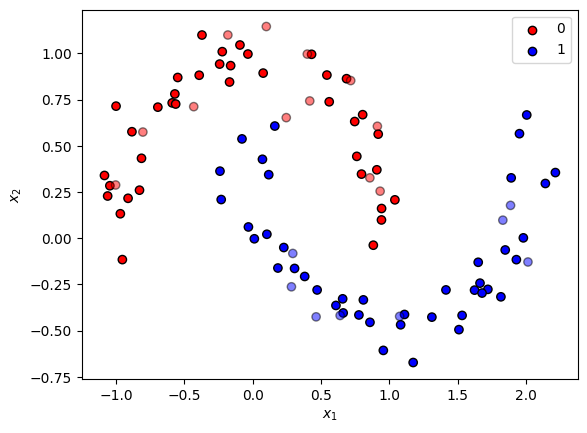

In [ ]:
cm_bright = ListedColormap(['red', 'blue'])

plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.5, edgecolors="k")
plt.scatter([], [], c='red', label='0', edgecolors='k')
plt.scatter([], [], c='blue', label='1', edgecolors='k')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

## Dataset

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

class ClassificationDataset(Dataset):
    def __init__(self, n_samples=100, split='train'):
        X, y = make_moons(n_samples=n_samples, shuffle=True, noise=0.1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        if split == 'train':
            self.X = torch.tensor(X_train, dtype=torch.float32).view(-1, 2)
            self.y = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
        elif split == 'test':
            self.X = torch.tensor(X_test, dtype=torch.float32).view(-1, 2)
            self.y = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
        else:
            raise ValueError("Invalid split. Use 'train' or 'test'.")

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:
train_dataset = ClassificationDataset(split='train')
test_dataset = ClassificationDataset(split='test')

In [ ]:
len(train_dataset), len(test_dataset)

(80, 20)

In [ ]:
sample = train_dataset[0]
print(sample[0].shape)
print(sample[1].shape)
sample

torch.Size([2])
torch.Size([1])


(tensor([0.5469, 0.8104]), tensor([0.]))

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [ ]:
batch = next(iter(train_dataloader))
print(batch[0].shape)
print(batch[1].shape)
batch

torch.Size([4, 2])
torch.Size([4, 1])


[tensor([[ 1.0315, -0.4530],
         [-0.9376,  0.3204],
         [ 0.2982,  0.8869],
         [-0.7626,  0.5794]]),
 tensor([[1.],
         [0.],
         [0.],
         [0.]])]

## Model

In [ ]:
from torch import nn

In [ ]:
class BinaryClassifier(nn.Module):
    def __init__(self, num_features=2, use_sigmoid=True):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid() if use_sigmoid else nn.Identity()
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
model = BinaryClassifier()
model(batch[0])

tensor([[0.5085],
        [0.5351],
        [0.5274],
        [0.5322]], grad_fn=<SigmoidBackward0>)

In [ ]:
model = BinaryClassifier(use_sigmoid=False)
model(batch[0])

tensor([[-0.0087],
        [ 0.0362],
        [ 0.0599],
        [ 0.0194]], grad_fn=<AddmmBackward0>)

## BCELoss, BCEWithLogitsLoss

In neural networks, raw value that is later converted into a probability is called a logit.

- Cross entropy
  - $P$: target
  - $Q$: model

$$
H(P, Q) = -\sum_x P(x) \log Q(x)
$$

- Bernoulli distribution; $x \in [0, 1]$

$$
P(x) = (1-p)^{1-x} p^x
$$

$$
Q(x) = (1-q)^{1-x} q^x
$$

- Binary cross entropy
$$
H_\text{BCE}(p, q) = -[(1-p)\log(1-q) + p \log q]
$$


Therefore,

$$
\begin{align}
L(\theta) & = -\sum_{i=1}^{N} (1-y_i)\log[(1-\sigma(f_\theta(x_i)))] + y_i \log[\sigma(f_\theta(x_i))] \\
& = \sum_{i=1}^{N}H_\text{BCE}(y_i, \sigma(f_\theta(x_i)))
\end{align}
$$

where 

$$
p = y_i
$$

$$
q = \sigma(f_\theta(x_i))
$$


$$
\frac{1}{N} \sum_{i=1}^{N}H_\text{BCE}(y_i, \sigma(f_\theta(x_i))) = \text{nn.BCELoss}(\sigma(f_\theta(x)), y) = \text{nn.BCEWithLogitsLoss}(f_\theta(x), y)
$$
- https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html
> BCEWithLogitsLoss combines a Sigmoid layer and the BCELoss in one single class. This version is more numerically stable than using a plain Sigmoid followed by a BCELoss as, by combining the operations into one layer, we take advantage of the log-sum-exp trick for numerical stability.

In [ ]:
sig = nn.Sigmoid()
bce = nn.BCELoss()
bce_logits = nn.BCEWithLogitsLoss()

In [ ]:
model = BinaryClassifier(use_sigmoid=False)

In [ ]:
inputs, targets = batch
inputs.shape, targets.shape

(torch.Size([4, 2]), torch.Size([4, 1]))

In [ ]:
logits = model(inputs)
logits.shape

torch.Size([4, 1])

In [ ]:
bce(sig(logits), targets)

tensor(0.7092, grad_fn=<BinaryCrossEntropyBackward0>)

In [ ]:
bce_logits(logits, targets)

tensor(0.7092, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [ ]:
-((1-targets)*torch.log(1-sig(logits)) + targets*torch.log(sig(logits))).mean()

tensor(0.7092, grad_fn=<NegBackward0>)

## Training

In [ ]:
from torch import optim

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

model = BinaryClassifier(use_sigmoid=True)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 10
losses = []
for epoch in range(n_epochs):
    model.train()
    train_loss = 0
    for batch in train_dataloader:
        x, y = batch

        probs = model(x)
        loss = criterion(probs, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_dataloader)
    losses.append(train_loss)

    print(f"Epoch [{epoch:3d}], Loss: {train_loss:.4f}")

Epoch [  0], Loss: 0.6494
Epoch [  1], Loss: 0.5468
Epoch [  2], Loss: 0.4462
Epoch [  3], Loss: 0.3586
Epoch [  4], Loss: 0.3004
Epoch [  5], Loss: 0.2637
Epoch [  6], Loss: 0.2374
Epoch [  7], Loss: 0.2226
Epoch [  8], Loss: 0.2084
Epoch [  9], Loss: 0.2013


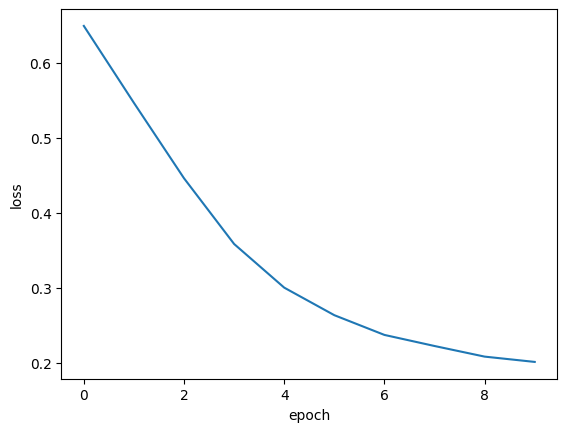

In [ ]:
plt.figure()
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
X_test, y_test = test_dataset.X, test_dataset.y

with torch.inference_mode():
    pred_probs = model(X_test)

In [ ]:
print(pred_probs.shape)
print(y_test.shape)

torch.Size([20, 1])
torch.Size([20, 1])


In [ ]:
print(pred_probs[:5])
print(y_test[:5])

tensor([[0.8162],
        [0.0406],
        [0.9140],
        [0.0336],
        [0.0180]])
tensor([[1.],
        [0.],
        [1.],
        [0.],
        [0.]])


In [ ]:
y_pred = (pred_probs > 0.5).float()
print(y_pred.shape)
print(y_pred[:5])

torch.Size([20, 1])
tensor([[1.],
        [0.],
        [1.],
        [0.],
        [0.]])


In [ ]:
(y_pred == y_test)

tensor([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True]])

In [ ]:
(y_pred == y_test).float()

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [ ]:
accuracy = (y_pred == y_test).float().mean()
accuracy

tensor(0.9500)

torch.Size([10000, 2])
torch.Size([10000, 1])
torch.Size([100, 100])


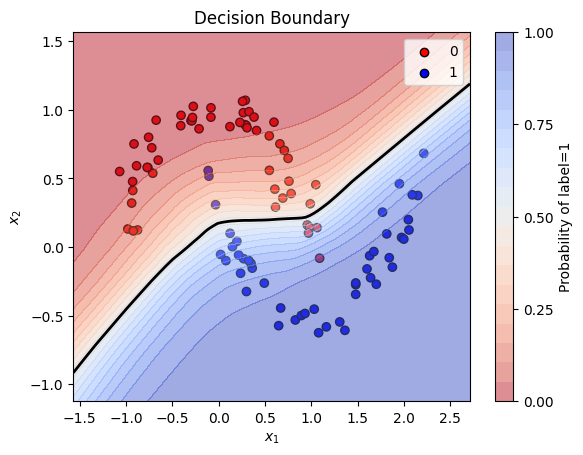

In [ ]:
X_train, y_train = train_dataset.X, train_dataset.y
X_test, y_test = test_dataset.X, test_dataset.y

X = torch.cat([X_train, X_test], dim=0)
y = torch.cat([y_train, y_test], dim=0)

x1_min = X[:, 0].min()-0.5
x1_max = X[:, 0].max()+0.5
x2_min = X[:, 1].min()-0.5
x2_max = X[:, 1].max()+0.5
x1, x2 = torch.meshgrid(torch.linspace(x1_min, x1_max, 100), torch.linspace(x2_min, x2_max, 100), indexing='ij')
grid_points = torch.cat([x1.reshape(-1, 1), x2.reshape(-1, 1)], dim=1)
print(grid_points.shape)

with torch.inference_mode():
    pred_probs = model(grid_points)

print(pred_probs.shape)
pred_probs = pred_probs.reshape(x1.shape)
print(pred_probs.shape)

cm_bright = ListedColormap(['red', 'blue'])

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors="k")
plt.scatter([], [], c='red', label='0', edgecolors='k')
plt.scatter([], [], c='blue', label='1', edgecolors='k')
cf = plt.contourf(x1.numpy(), x2.numpy(), pred_probs.numpy(), levels=torch.linspace(0, 1, 20), cmap='coolwarm_r', alpha=0.5)
plt.contour(x1.numpy(), x2.numpy(), pred_probs.numpy(), levels=[0.5], colors='black', linewidths=2)  # Decision boundary
plt.title("Decision Boundary")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
cbar = plt.colorbar(cf, label="Probability of label=1")
cbar.set_ticks(torch.linspace(0, 1, 5))
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.legend()
plt.show()

## Summary

In [ ]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Data
class ClassificationDataset(Dataset):
    def __init__(self, n_samples=100, split='train'):
        X, y = make_moons(n_samples=n_samples, shuffle=True, noise=0.1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        if split == 'train':
            self.X = torch.tensor(X_train, dtype=torch.float32).view(-1, 2)
            self.y = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
        elif split == 'test':
            self.X = torch.tensor(X_test, dtype=torch.float32).view(-1, 2)
            self.y = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
        else:
            raise ValueError("Invalid split. Use 'train' or 'test'.")

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Model
class BinaryClassifier(nn.Module):
    def __init__(self, num_features=2, use_sigmoid=True):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid() if use_sigmoid else nn.Identity()
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
def evaluate(model, train_dataset, test_dataset, model_use_sigmoid=True):
    X_train, y_train = train_dataset.X, train_dataset.y
    X_test, y_test = test_dataset.X, test_dataset.y

    sigmoid = nn.Sigmoid()

    # Test
    with torch.inference_mode():
        if model_use_sigmoid:
            pred_probs = model(X_test)
        else:
            pred_probs = sigmoid(model(X_test))
    y_pred = (pred_probs > 0.5).float()
    accuracy = (y_pred == y_test).float().mean()
    print(f"Accuracy: {accuracy*100:.0f} %")

    # Decision boundary
    X = torch.cat([X_train, X_test], dim=0)
    y = torch.cat([y_train, y_test], dim=0)

    x1_min = X[:, 0].min()-0.5
    x1_max = X[:, 0].max()+0.5
    x2_min = X[:, 1].min()-0.5
    x2_max = X[:, 1].max()+0.5
    x1, x2 = torch.meshgrid(torch.linspace(x1_min, x1_max, 100), torch.linspace(x2_min, x2_max, 100), indexing='ij')
    grid_points = torch.cat([x1.reshape(-1, 1), x2.reshape(-1, 1)], dim=1)
    with torch.inference_mode():
        if model_use_sigmoid:
            pred_probs = model(grid_points)
        else:
            pred_probs = sigmoid(model(grid_points))
    pred_probs = pred_probs.reshape(x1.shape)
    cm_bright = ListedColormap(['red', 'blue'])
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolors="k")
    plt.scatter([], [], c='red', label='0', edgecolors='k')
    plt.scatter([], [], c='blue', label='1', edgecolors='k')
    cf = plt.contourf(x1.numpy(), x2.numpy(), pred_probs.numpy(), levels=torch.linspace(0, 1, 20), cmap='coolwarm_r', alpha=0.5)
    plt.contour(x1.numpy(), x2.numpy(), pred_probs.numpy(), levels=[0.5], colors='black', linewidths=2)  # Decision boundary
    plt.title("Decision Boundary")
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    cbar = plt.colorbar(cf, label="Probability of label=1")
    cbar.set_ticks(torch.linspace(0, 1, 5))
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.legend()
    plt.show()

### BCELoss

Epoch [  0], Loss: 0.6328
Epoch [ 10], Loss: 0.1805
Epoch [ 20], Loss: 0.0808
Epoch [ 30], Loss: 0.0375
Epoch [ 40], Loss: 0.0179


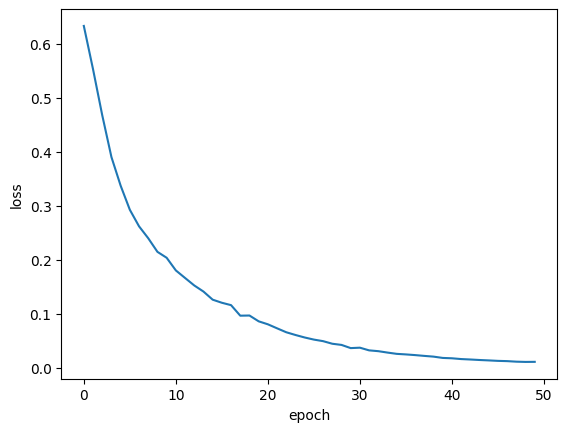

Accuracy: 100 %


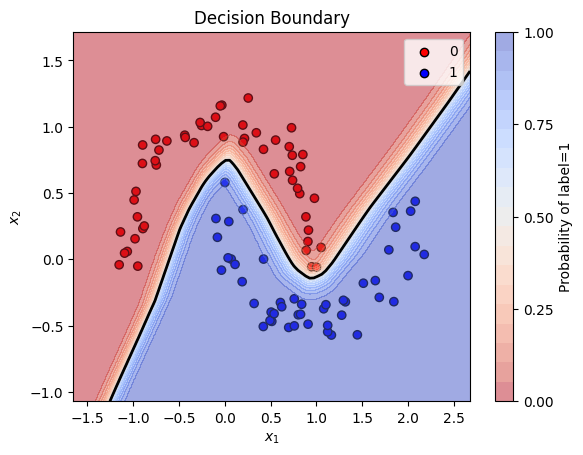

In [ ]:
# Dataset
train_dataset = ClassificationDataset(split='train')
test_dataset = ClassificationDataset(split='test')

# DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Model with sigmoid + BCELoss
model = BinaryClassifier(use_sigmoid=True)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
losses = []
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for batch in train_dataloader:
        x, y = batch

        probs = model(x)
        loss = criterion(probs, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_dataloader)
    losses.append(train_loss)

    if epoch % 10 == 0:
        print(f"Epoch [{epoch:3d}], Loss: {train_loss:.4f}")

# Loss curve
plt.figure()
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

evaluate(model, train_dataset, test_dataset, model_use_sigmoid=True)

### BCEWithLogitsLoss

Epoch [  0], Loss: 0.6654
Epoch [ 10], Loss: 0.2395
Epoch [ 20], Loss: 0.1215
Epoch [ 30], Loss: 0.0566
Epoch [ 40], Loss: 0.0302


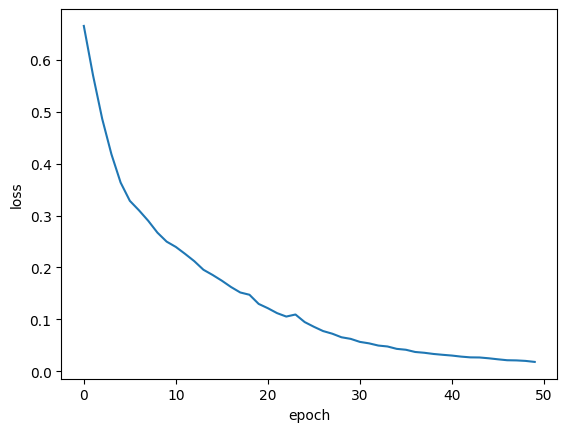

Accuracy: 100 %


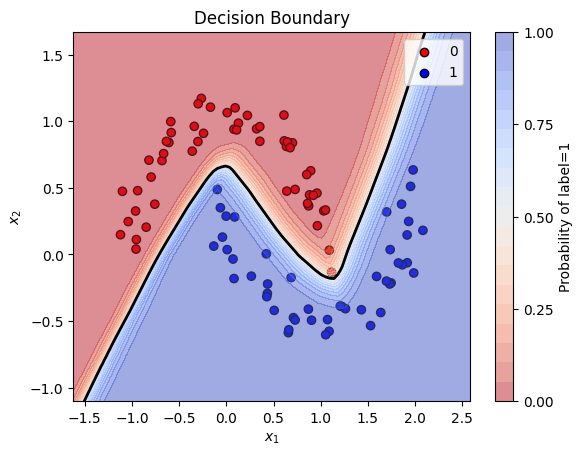

In [ ]:
# Dataset
train_dataset = ClassificationDataset(split='train')
test_dataset = ClassificationDataset(split='test')

# DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Model without sigmoid + BCEWithLogitsLoss
model = BinaryClassifier(use_sigmoid=False)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
losses = []
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for batch in train_dataloader:
        x, y = batch

        probs = model(x)
        loss = criterion(probs, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_dataloader)
    losses.append(train_loss)

    if epoch % 10 == 0:
        print(f"Epoch [{epoch:3d}], Loss: {train_loss:.4f}")

# Loss curve
plt.figure()
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

evaluate(model, train_dataset, test_dataset, model_use_sigmoid=False)